# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
- 'RM': The number of rooms per house should be positively correlated with the price of the house. So for an increase in 'RM' we expect an increase in the price 'MEDV'. The number of rooms probably has a similar behaviour to the size of the houses. But it's necessary to plot these features to really check this. But at least as intuition goes, this is what we can expect.

- 'LSTAT': For this feature we expected the opposite as before (negative correlation). As the percentage of "lower class" homeowners increase, the average housing price should decrease. This should be straight forward as the previous discussion. People with less money can afford less valuable houses.

- 'PTRATIO': This feature is tricky. I must say that I do not have a good intuition about this. I suppose this kind of feature has very low impact on pricing. Therefore, the correlation should be small. Changing this ratio should not affect much the price of the houses nearby.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import r2_score

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**

By looking at the table only, it is hard to have a quantitative idea of how well the model is doing. But qualitatively one can see that it does describe well the y-values. When the true value increases/decreases, the predicted values follow. The true-predicted is not very far also, but then as I said, it's hard to have a quantitative idea only by looking at the numbers.
But calculating the correlation between true and predicted values (using the r2_score function), it confirms that the 2 columns are strongly correlated (score of 0.923), therefore the model did a very good job predicting the outcome.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
def split_data(X, y):
    from sklearn.cross_validation import train_test_split
    return train_test_split(X, y, test_size=0.2, random_state = 1)

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = split_data(features, prices)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

The main reason behind the practice of testing your model on a different data set is over-fitting. It might happen that instead of the model learning from the data, it "memorizes" it, i.e., it was trained so much to predict that particular set of outcomes that it is the only set that it can "predict".

By testing the model's predictions on a different data set, we can check if it is indeed performing well and making predictions close to the true value or if it performing poorly.
It is good practice to do this process more than once, by doing so we have an even more reliable test of the model's performance. By doing it only once, we could get "unlucky" and even if the model if over-fitted, it can do well predicting the test set, in case the test set is very similar to the train set.

By doing it more thatn once, we should be able to see a large variance in the model's predictions in an over-fitted case. And a more constant performance for a robust predictor.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

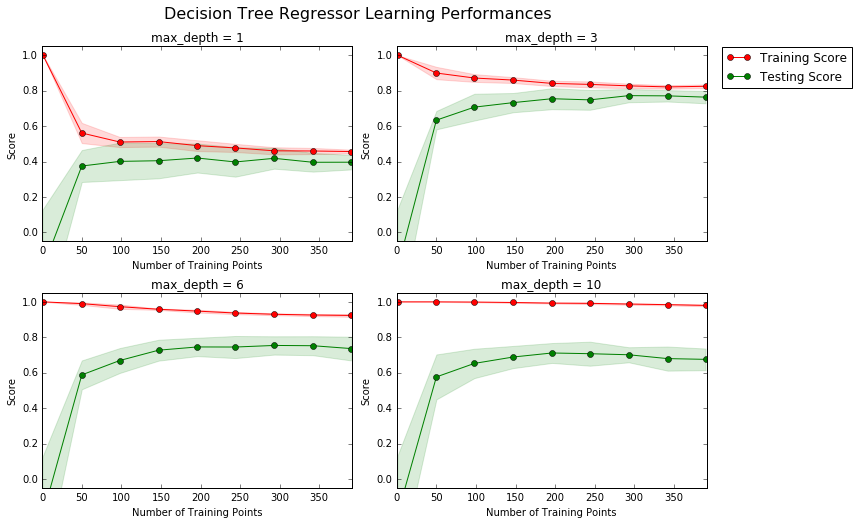

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

Looking at the first plot (with max_depth = 1) we can see that as more training points are added, the score of the training curve gets lower. This is true for all plots, but we can see that as the depth is increased, the way the score goes down is much slower. Almost linearly for depth=10.

For the testing curves we see an increase in score as the number of training points rise. This is also expected since the model can learn more aspects of the data set by having looking at more points. But in both cases (red/green) we see that the increase/decrease of the curves saturate. They start rise or fall really fast when npoints = ~1->~50 and then reach a plateau after ~100 points. 

This saturation shows that increasing the number of points would not benefit the model. After a certain point, there's not more aspects in the data to be learned and the model has learned everything it was able to learn. 

Together with the slow decrease of the training curve (as depth increases), it is worth noticing that the gap between the two curves get bigger. It seems that for depth=6 the model starts to get over-fitted, so it predicts the training set itself very well, but the test set is not so well predicted. For depth=10 this is even more apparent as the gap gets even larger and test scores get even lower, even though the training scores are doing very well.

It looks like depth=3 is the best out of the 4 choices. Having the best test score (a bit less than ~80%) and a small gap between training and test curves. For depth=1 the model does not have enough capability to learn different aspects of data, so even though the gap is small, both score curves are low.

A comment on the fast rise/fall of the curves for low npoints: We can understand that behaviour since for only 1 point, the model is able to "learn" everything it can from that single point. Therefore, with you test it using the same point (training set) it will get it right always. But if you given a different point from the test set with different features, it will basically be a random guess of the outcome. That's basically why training scores are very high and test scores are high. But as npoints increases, the model starts actually learning from data and it is able to make better predictions.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

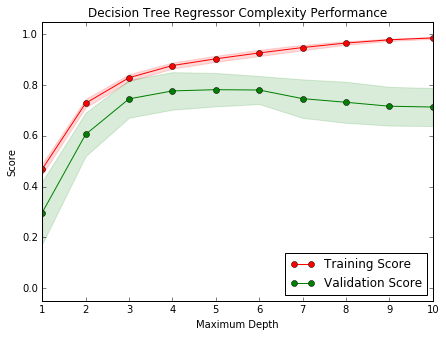

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

For a max depth (d) of 1, the model suffers from high bias. It is likely that we are underfitting the data by using a model that is too simple and is not able to capture more features of the data set. We can see that the training and tests scores for depth=1 are very low compared to other values for d. Train data produces a socre ~50% and test data ~30%. Both values are permorming significantly worse than any other choice of d. Which indicates we are underfitting the data.

For d=10, we have overfitted the model, introducing high variance on our analysis. As we saw on the course, one sign of high variance is a much higher error on the test set than on training set. The model pays too much attention do the train set and it is unable to generalize well to new data. That is why the gap between train and test scores is largest for d=10. Train data scores almost 100% with small uncertainty while test scores are around 70% with a much larger fluctuation.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

It seems that d=3,4 or 5 are the best values for the maximum depth. It's hard to say from this graph only and it would be nice to have some quantitative results also. The case d=3 seems to be the one where the gap (between red and green curves) is smaller.
But d=4 and 5 have higher scores and the variance (green band) looks smaller for these cases also.

So choosing the model with best score and least variance, I'd say d=5 is best. It seems to have more bias than d=3, but it still is able to perform better in test data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Most classifier algorithms will have at least one adjustable parameter. It is important to study the performance of the fitter for different choices of parameter sets.

A grid search is a way to evaluate how well the classifier is doing as a function of the chosen parameters. By doing so, one can chose the set of parameters that provide the best result, in other words, optimize the fitter. In particular, a grid search exhaustive searches over all possible combinations of parameters.
For instance, in case one model has two free parameters, A and B and one chooses to search for A = [1,2,3] and B = [10,20], then the grid search will try all combinations: [(1,10),(2,10),(3,10),(1,20),(2,20),(3,20)]. And finally return which set has the best performance according to some score criteria selected by the analyst.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

K-fold cross-validation is a generalized way to perform train/test splits in the data sample. For a given value of k (free parameter), the data is split in k equal parts (folds), k-1 of these will be used for training the model while the 1 that was left out is used for testing. This procedure is repeated k times until all k possible folds were used for testing. We then have an array of scores for each k iteration and by looking at the mean score we have a better estimate of the test score than train/test split which only has 1 test score. 

When performing a grid search, it is common to find a set of parameters that will do increadibly well when predicting the train data. So depending on the values chosen, it is easy to overfit the set of data. K-fold cross validation can help to spot these cases. When optimizing the fitter, it is important to look at multiple outputs and not only the final score, like accuracy. As discussed in the other questions, it helps to look at the uncertainty in the fit and how results change when predicting train and test data, avoiding bias and variance issues with the fitter.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
   
    from sklearn.tree import DecisionTreeRegressor as dt
    from sklearn.metrics import make_scorer
    from sklearn.grid_search import GridSearchCV as gridCV
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = dt(random_state = 42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = gridCV(regressor, param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **

It seems that max depth = 5 is indeed the best choice for the decision tree classifier as we discussed above.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home(red): $419,700.00
Predicted selling price for Client 2's home(yellow): $287,100.00
Predicted selling price for Client 3's home(green): $927,500.00


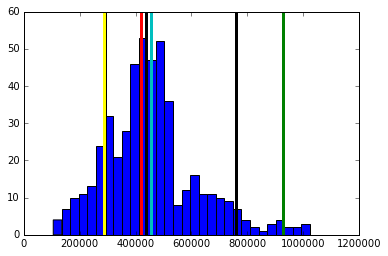

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1 - red
               [4, 32, 22], # Client 2 - yeallow
               [8, 3, 12]]  # Client 3 - green

# Show predictions. Mean price in cyan, percentiles 15%,50% and 95% in black
plt.hist(prices, bins = 30)
house_colors = ['red','yellow','green']
quartiles = np.percentile(prices,[15,50,95])
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {0}'s home({2}): ${1:,.2f}".format(i+1, price,house_colors[i])
    plt.axvline(price, c = house_colors[i], lw = 3)
    plt.axvline(quartiles[i], c = 'k', lw = 3)
plt.axvline(np.mean(prices), c = 'c', lw = 3)
plt.show()

In [11]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


In [14]:
prices.describe()

count        489.000000
mean      454342.944785
std       165340.277653
min       105000.000000
25%       350700.000000
50%       438900.000000
75%       518700.000000
max      1024800.000000
Name: MEDV, dtype: float64

In [27]:
from sklearn.neighbors import NearestNeighbors
num_neighbors=5
def nearest_neighbor_price(x):
    def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
        neigh = NearestNeighbors( num_neighbors )
        neigh.fit(X)
        distance, indexes = neigh.kneighbors( x )
        return indexes
    indexes = find_nearest_neighbor_indexes(x, features)
    sum_prices = [prices[i] for i in indexes]
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg
for index,i in enumerate(client_data,start=1):
    val = nearest_neighbor_price(np.array(i).reshape(1,-1))
    print "The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, val)

The predicted 5 nearest neighbors price for home 1 is: $372,540.00
The predicted 5 nearest neighbors price for home 2 is: $162,120.00
The predicted 5 nearest neighbors price for home 3 is: $897,120.00


**Answer: **

Our predicting model returned these prices for each client:
1. Client 1: 419,700.00
2. Client 2: 287,100.00
3. Client 3: 927,500.00

All prices are within the min-max range of the data set that we looked in the exploration section. We can see that our intuition on number of rooms and poverty percentage appears to be correct here. As the number of rooms increase, the price also goes up and for higher poverty the price goes down.

By looking at the description of each of the features in our data set we can understand more about our predictions:
- Client 3's house has 8 rooms, which is basically the max number of rooms a house has in our data set. Its poverty percentage is also close to the minimum value of all houses. Therefore we can predict a very high value for this house and by looking at the green line in the price distribution (our model's prediction) we see that indeed the model returned a price among the most expensive houses of our data set (3rd quartile, actually it is more expensive than 95% of the houses).
- Client 2's house has almost the minimum number of rooms and a very high lstat, we expect this house to be given a very low price. By looking at the yellow line in the plot, we can see that indeed this house was evaluated as one of the cheaper houses in the data set (it falls in the first quartile, or even below the 15% percentile).
- Client 1's house has slightly below average number of rooms and an above average lstat. We would expect this to make its price go down a bit below average and it is indeed the case when we look at the red curve. It's below the median and the mean of the distribution.

So it looks like the model is returning reasonable values. The predicted prices follow what one can expect for these sets of features.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
Average price: $404,978.72


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

In its current state the model is too simple be used in a real company for predictions. But the use of Machine Learning to make such predictions is certainly valuable and I would guess that many real state companies already use it.

The questions here exemplify why the model is too simple:
- We did not take into account inflation from the 70's to current period and also the house market readjustments.
- There are many more features in a house that can be used to predict its price more accurately. One of the most obvious is the size of the house. Even though the size likely to be very correlated with the number of rooms, it's possible for a house to be large and have few rooms and vice-versa.
- We just saw that for different sets of train/test data, the price predictions for client 1 vary almost 20% among different sets. So a more robust (less variance) fitter would be better.
- Certainly this model can not be used to make predictions of houses in other cities. Specially rural areas that have a very different house market compared to an urban city like Boston, where we got the data set from.

Therefore this model can not be used for a real-world setting, where the accuracy of the numbers is crucial.